In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("BC_Data.csv")
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
316,894090,B,12.180,14.08,77.25,461.4,0.07734,0.03212,0.01123,0.005051,...,16.47,81.60,513.1,0.10010,0.05332,0.04116,0.01852,0.2293,0.06037,NaN
554,924632,B,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.023430,...,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242,NaN
63,859196,B,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.021800,...,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,NaN
387,902976,B,13.880,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,...,19.97,99.66,745.3,0.08484,0.12330,0.10910,0.04537,0.2542,0.06623,NaN
149,869931,B,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.013290,...,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014,NaN


In [3]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
df.drop('id',axis='columns',inplace=True)

In [6]:
df.sample(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
512,M,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,...,29.66,113.30,844.4,0.15740,0.3856,0.5106,0.20510,0.3585,0.1109,NaN
63,B,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,19.23,65.59,310.1,0.09836,0.1678,0.1397,0.05087,0.3282,0.0849,NaN


In [7]:
df.drop('Unnamed: 32',axis='columns',inplace=True)

In [8]:
df.sample(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
262,M,17.29,22.13,114.40,947.8,0.08999,0.1273,0.09697,0.07507,0.2108,...,20.39,27.24,137.90,1295.0,0.1134,0.2867,0.2298,0.15280,0.3067,0.07484
331,B,12.98,19.35,84.52,514.0,0.09579,0.1125,0.07107,0.02950,0.1761,...,14.42,21.95,99.21,634.3,0.1288,0.3253,0.3439,0.09858,0.3596,0.09166


In [9]:
cols_to_scale = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                 'concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se',
                 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
                 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [87]:
len(cols_to_scale)

30

In [10]:
df.sample(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
241,B,0.257419,0.180250,0.240619,0.141251,0.240408,0.044629,0.024672,0.055070,0.245455,...,0.187478,0.222548,0.166542,0.088036,0.214819,0.048966,0.049864,0.139244,0.263355,0.083891
420,B,0.217190,0.315522,0.210144,0.112916,0.296380,0.177412,0.128515,0.070974,0.490404,...,0.182853,0.398721,0.179391,0.082408,0.354817,0.161452,0.204473,0.229003,0.289769,0.182343


In [11]:
X = df.drop('diagnosis',axis='columns')
y = testLabels = df.diagnosis.astype(np.object)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
y_train.value_counts()

B    289
M    166
Name: diagnosis, dtype: int64

In [14]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [15]:
len(X_train.columns)

30

# Undersample

In [16]:
# Class count
count_class_B, count_class_M = df.diagnosis.value_counts()
print(count_class_B, count_class_M)

# Divide by class
df_class_M = df[df['diagnosis'] == 'M']
df_class_B = df[df['diagnosis'] == 'B']

357 212


In [17]:
# Undersample 0-class and concat the DataFrames of both class
df_class_B_under = df_class_B.sample(count_class_M)
df_test_under = pd.concat([df_class_B_under, df_class_M], axis=0)

print('Random under-sampling:')
print(df_test_under.diagnosis.value_counts())

Random under-sampling:
B    212
M    212
Name: diagnosis, dtype: int64


# Oversample

In [19]:
# Oversample M-class and concat the DataFrames of both classes
df_class_M_over = df_class_M.sample(count_class_B, replace=True)
df_test_over = pd.concat([df_class_M_over, df_class_B], axis=0)

print('Random over-sampling:')
print(df_test_over.diagnosis.value_counts())

Random over-sampling:
B    357
M    357
Name: diagnosis, dtype: int64


# Ensemble with undersampling

In [20]:
X = df.drop('diagnosis',axis='columns')
y = df['diagnosis']

In [21]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [25]:
df_test_over.to_csv('data_over.csv')

In [26]:
df_test_under.to_csv('data_under.csv')

# EDA

In [55]:
bc = pd.read_csv("data_over.csv")
mean=bc.iloc[:,1:11]
se=bc.iloc[:,12:22]
worst=bc.iloc[:,22:]

In [56]:
mean.sample(2)
se.sample(2)


,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
87,0.399602,0.261846,0.437874,0.304816,0.163239,0.634091,0.262626,0.469786,0.326983,0.143105
208,0.103639,0.148692,0.086227,0.085054,0.113200,0.101601,0.053460,0.155048,0.069483,0.034451


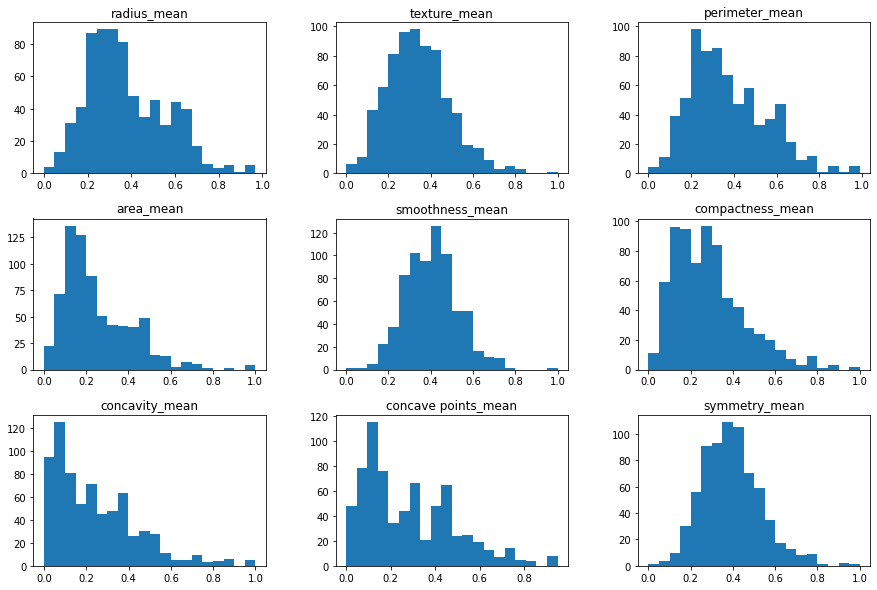

In [57]:
mean_histogram = mean.hist(bins=20, figsize=(15, 10),grid=False,)

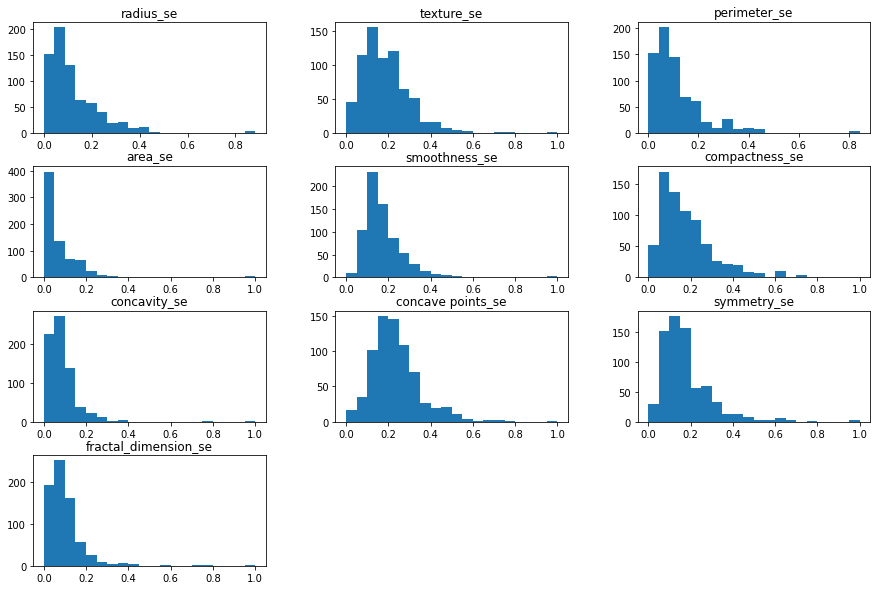

In [58]:
se_histogram = se.hist(bins=20, figsize=(15, 10),grid=False,)

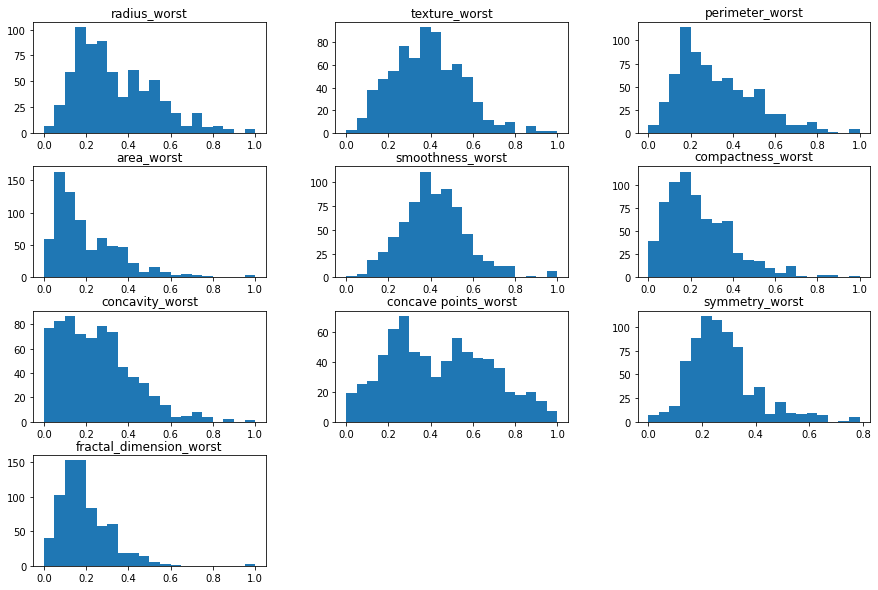

In [59]:
worst_histogram = worst.hist(bins=20, figsize=(15, 10),grid=False,)

In [60]:
cor = mean.corr()

<AxesSubplot:>

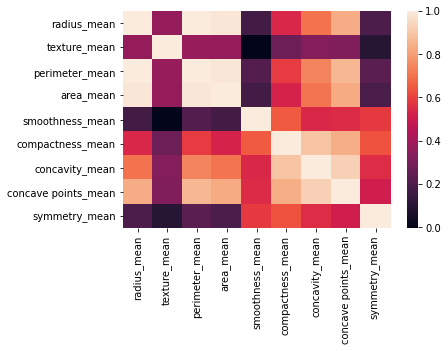

In [61]:
import seaborn as sn

sn.heatmap(cor, annot=True, )

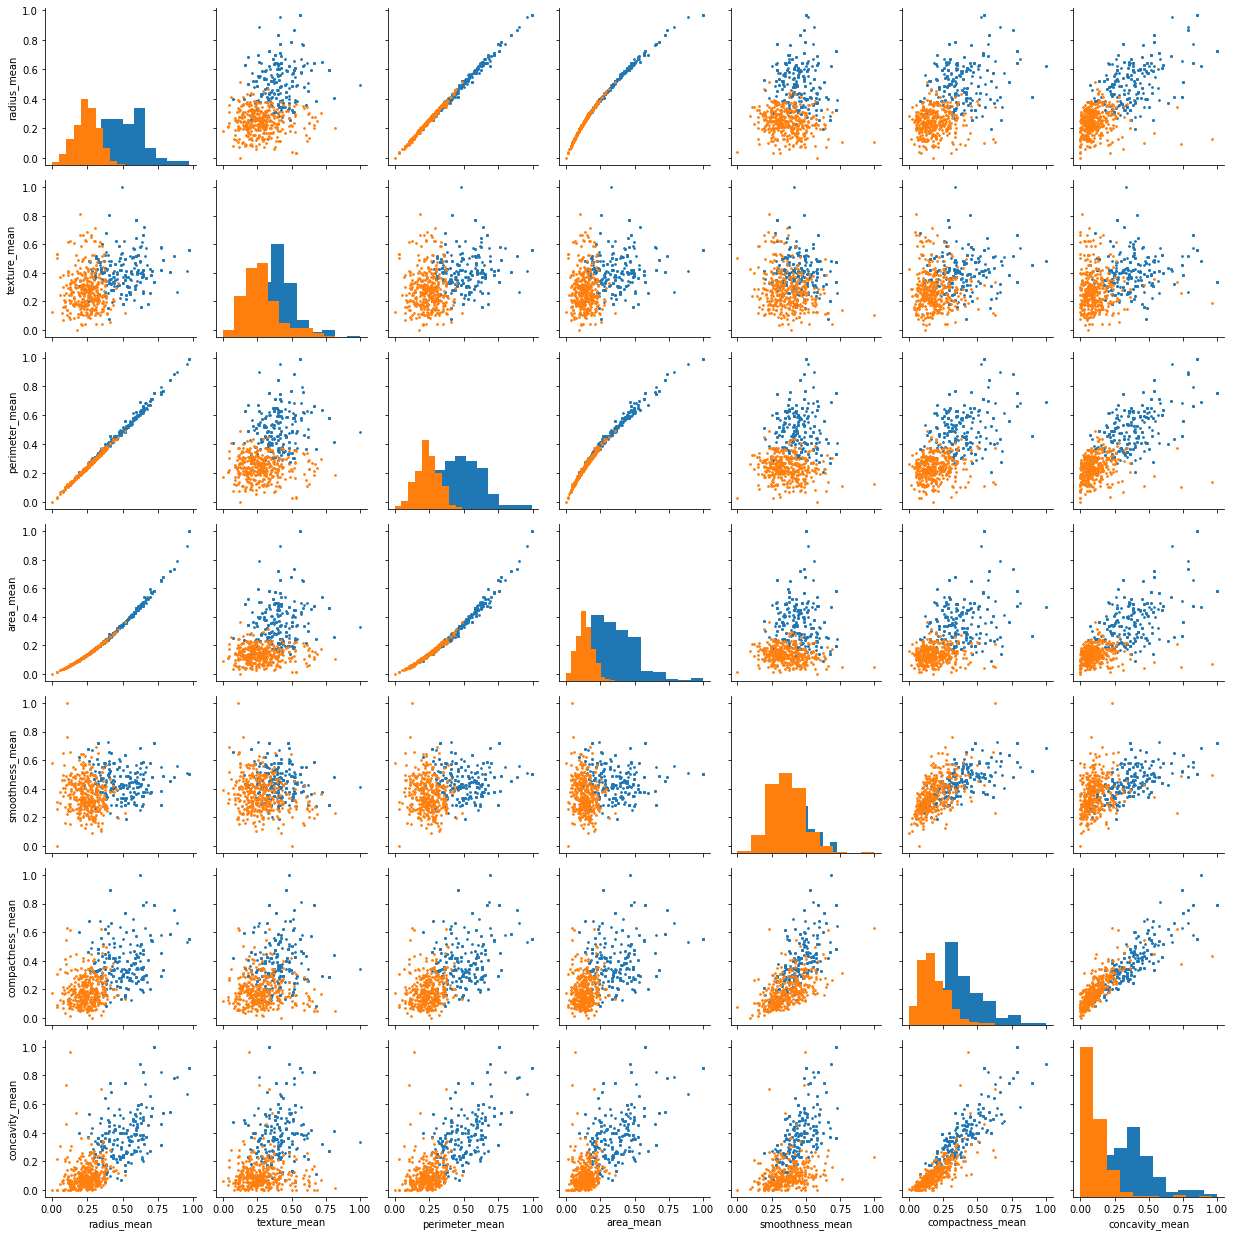

In [63]:
g = sn.PairGrid(bc[[bc.columns[1],bc.columns[2],bc.columns[3],
                     bc.columns[4], bc.columns[5],bc.columns[6],bc.columns[7],bc.columns[8]]],hue='diagnosis' )
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

# BinaryClassifier - Standard dataset

In [65]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [473]:
#standard dataset
sd = pd.read_csv("BC_Data.csv")
#using mean values of the 20 parameters
X = sd.iloc[:,2:22]
y = sd.iloc[:,1]

In [475]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.2, random_state=42)

In [476]:
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size = 0.2, random_state=42)

In [477]:
tree_clf_sd = DecisionTreeClassifier(max_depth=2)
tree_clf_sd.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [478]:
cols_to_scale = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                 'concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se',
                 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
                 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']
export_graphviz(
            tree_clf_sd,
            feature_names=cols_to_scale[:20],
            class_names=['M','B'],
            rounded=True,
            filled=True,
            out_file=("mean_sd_binaryclassif.dot"),
        )

In [332]:
!dot -Tpng mean_sd_binaryclassif.dot -o underdata_meanse.png

In [333]:
y_pred = tree_clf_sd.predict(X_test)

In [334]:
print("for standard dataset, accuracy_Score is:",metrics.accuracy_score(y_test, y_pred))

for standard dataset, accuracy_Score is: 0.8823529411764706


In [335]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[34,  4],
       [ 4, 26]], dtype=int64)

In [336]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.89      0.89      0.89        38
           M       0.87      0.87      0.87        30

    accuracy                           0.88        68
   macro avg       0.88      0.88      0.88        68
weighted avg       0.88      0.88      0.88        68



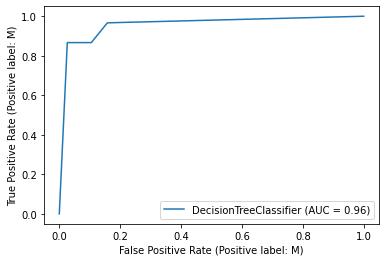

In [337]:
metrics.plot_roc_curve(tree_clf_sd, X_test, y_test)

# BinaryClassifier - oversample dataset

In [480]:
df = pd.read_csv("data_over.csv")
#using all parameters
X = df.iloc[:,2:32]
y = df.iloc[:,1]

In [241]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size = 0.2, random_state=42)

In [242]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [243]:
cols_to_scale = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                 'concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se',
                 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
                 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']
export_graphviz(
            tree_clf,
            feature_names=cols_to_scale[:30],
            class_names=['M','B'],
            rounded=True,
            filled=True,
            out_file=("mean_se_oversample.dot"),
        )

In [244]:
!dot -Tpng mean_se_oversample.dot -o oversample_meanse.png

In [245]:
y_pred = tree_clf.predict(X_test)

In [246]:
print("for oversample dataset, accuracy_Score is:",metrics.accuracy_score(y_test, y_pred))

for oversample dataset, accuracy_Score is: 0.9210526315789473


In [247]:
print("for oversample dataset, precision_score is:",metrics.precision_score(y_test, y_pred, average=None))

for oversample dataset, precision_score is: [0.93333333 0.91304348]


In [248]:
print("for oversample dataset, recall_score is:",metrics.recall_score(y_test, y_pred, average=None))

for oversample dataset, recall_score is: [0.875      0.95454545]


In [249]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[42,  6],
       [ 3, 63]], dtype=int64)

In [250]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      0.88      0.90        48
           M       0.91      0.95      0.93        66

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



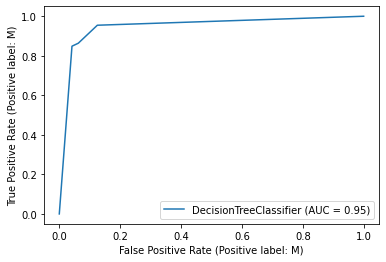

In [251]:
from sklearn.metrics import roc_curve, auc 
metrics.plot_roc_curve(tree_clf, X_test, y_test)

# BinaryClassifier - Undersample

In [318]:
df_us = pd.read_csv("data_under.csv")
#using mean+se values of the 10 parameters
X = df_us.iloc[:,2:22]
y = df_us.iloc[:,1]

In [319]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size = 0.2, random_state=42)

In [320]:
from sklearn.tree import DecisionTreeClassifier
tree_clf_us = DecisionTreeClassifier(max_depth=2)
tree_clf_us.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [321]:
cols_to_scale = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                 'concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se',
                 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
                 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']
export_graphviz(
            tree_clf_us,
            feature_names=cols_to_scale[:20],
            class_names=['M','B'],
            rounded=True,
            filled=True,
            out_file=("mean_undersample_binaryclassif.dot"),
        )

In [322]:
!dot -Tpng mean_undersample_binaryclassif.dot -o undersample_mean_se.png

In [ ]:
y_pred = tree_clf.predict(X_test)

In [259]:
print("for undersample dataset, accuracy_Score is:",metrics.accuracy_score(y_test, y_pred))

for undersample dataset, accuracy_Score is: 0.9558823529411765


In [260]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[35,  3],
       [ 0, 30]], dtype=int64)

In [261]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       1.00      0.92      0.96        38
           M       0.91      1.00      0.95        30

    accuracy                           0.96        68
   macro avg       0.95      0.96      0.96        68
weighted avg       0.96      0.96      0.96        68



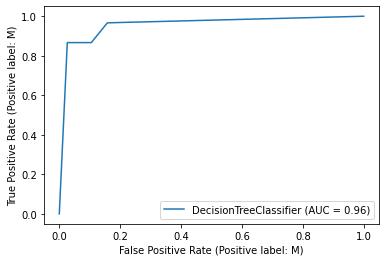

In [262]:
metrics.plot_roc_curve(tree_clf_us, X_test, y_test)

# Randomforests - Over sample

In [210]:
from sklearn.ensemble import RandomForestClassifier

In [338]:
#oversample, only mean params
df = pd.read_csv("data_over.csv")
#using mean values of the 10 parameters
X = df.iloc[:,2:12]
y = df.iloc[:,1]

In [339]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size = 0.2, random_state=42)

In [340]:
rfc = RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [341]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [342]:
y_pred = rfc.predict(X_test)

In [343]:
y_pred

array(['B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M',
       'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'M'], dtype=object)

In [344]:
print("for oversample dataset, accuracy_Score is:",metrics.accuracy_score(y_test, y_pred))

for oversample dataset, accuracy_Score is: 0.9210526315789473


In [345]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.90      0.92      0.91        48
           M       0.94      0.92      0.93        66

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



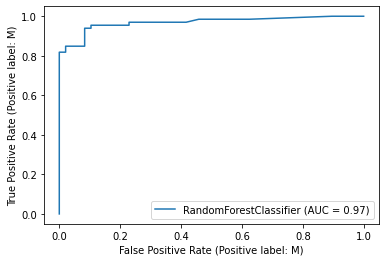

In [347]:
metrics.plot_roc_curve(rfc, X_test, y_test)

In [351]:
cols_to_scale = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                 'concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se',
                 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
                 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']
estimator = rfc.estimators_[5]
export_graphviz(
            estimator,
            feature_names=cols_to_scale[:10],
            class_names=['M','B'],
            rounded=True,
            filled=True,
            out_file=("mean_over_RFC.dot"),
        )

In [352]:
!dot -Tpng mean_over_RFC.dot -o mean_over_RFC.png

In [367]:
#oversample, only mean+se params
df_2 = pd.read_csv("data_over.csv")
#using mean values of the 20 parameters
X = df_2.iloc[:,2:22]
y = df_2.iloc[:,1]

In [355]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size = 0.2, random_state=42)

In [356]:
rfc_2 = RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [357]:
rfc_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [358]:
y_pred = rfc_2.predict(X_test)

In [359]:
print("for oversample dataset, accuracy_Score is:",metrics.accuracy_score(y_test, y_pred))

for oversample dataset, accuracy_Score is: 0.9385964912280702


In [360]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.92      0.94      0.93        48
           M       0.95      0.94      0.95        66

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



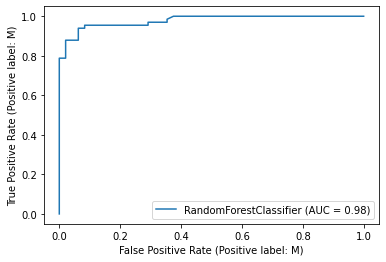

In [362]:
metrics.plot_roc_curve(rfc_2, X_test, y_test)

In [365]:
cols_to_scale = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                 'concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se',
                 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
                 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']
estimator = rfc_2.estimators_[5]
export_graphviz(
            estimator,
            feature_names=cols_to_scale[:20],
            class_names=['M','B'],
            rounded=True,
            filled=True,
            out_file=("meanse_over_RFC.dot"),
        )

In [379]:
!dot -Tpng meanse_over_RFC.dot -o meanse_over_RFC.png

In [370]:
#oversample, all params
df_3 = pd.read_csv("data_over.csv")
#using mean values of the 20 parameters
X = df_3.iloc[:,2:32]
y = df_3.iloc[:,1]

In [371]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size = 0.2, random_state=42)

In [372]:
rfc_3 = RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [373]:
rfc_3.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [374]:
y_pred = rfc_3.predict(X_test)

In [375]:
print("for oversample dataset, accuracy_Score is:",metrics.accuracy_score(y_test, y_pred))

for oversample dataset, accuracy_Score is: 0.9385964912280702


In [376]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.94      0.92      0.93        48
           M       0.94      0.95      0.95        66

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



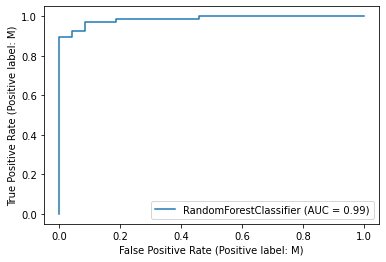

In [377]:
metrics.plot_roc_curve(rfc_3, X_test, y_test)

In [378]:
cols_to_scale = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                 'concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se',
                 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
                 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']
estimator = rfc_3.estimators_[5]
export_graphviz(
            estimator,
            feature_names=cols_to_scale[:],
            class_names=['M','B'],
            rounded=True,
            filled=True,
            out_file=("all_over_RFC.dot"),
        )

In [380]:
!dot -Tpng all_over_RFC.dot -o all_over_RFC.png

# Random Forests - Undersample

In [381]:
#undersample, mean params
df_4 = pd.read_csv("data_under.csv")
#using mean values of the 20 parameters
X = df_4.iloc[:,2:12]
y = df_4.iloc[:,1]

In [382]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size = 0.2, random_state=42)

In [383]:
rfc_4 = RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [385]:
rfc_4.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [386]:
y_pred = rfc_4.predict(X_test)

In [387]:
print("for undersample dataset, accuracy_Score is:",metrics.accuracy_score(y_test, y_pred))

for undersample dataset, accuracy_Score is: 0.9117647058823529


In [388]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.87      0.92        38
           M       0.85      0.97      0.91        30

    accuracy                           0.91        68
   macro avg       0.91      0.92      0.91        68
weighted avg       0.92      0.91      0.91        68



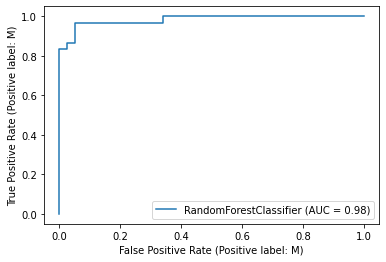

In [389]:
metrics.plot_roc_curve(rfc_4, X_test, y_test)

In [392]:
cols_to_scale = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                 'concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se',
                 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
                 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']
estimator = rfc_4.estimators_[5]
export_graphviz(
            estimator,
            feature_names=cols_to_scale[:10],
            class_names=['M','B'],
            rounded=True,
            filled=True,
            out_file=("mean_under_RFC.dot"),
        )

In [393]:
!dot -Tpng mean_under_RFC.dot -o mean_under_RFC.png

In [394]:
#undersample, mean+se params
df_5 = pd.read_csv("data_under.csv")
#using mean values of the 20 parameters
X = df_5.iloc[:,2:22]
y = df_5.iloc[:,1]

In [395]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size = 0.2, random_state=42)

In [396]:
rfc_5 = RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [397]:
rfc_5.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [398]:
y_pred = rfc_5.predict(X_test)

In [399]:
print("for undersample dataset, accuracy_Score is:",metrics.accuracy_score(y_test, y_pred))

for undersample dataset, accuracy_Score is: 0.9264705882352942


In [400]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.89      0.93        38
           M       0.88      0.97      0.92        30

    accuracy                           0.93        68
   macro avg       0.93      0.93      0.93        68
weighted avg       0.93      0.93      0.93        68



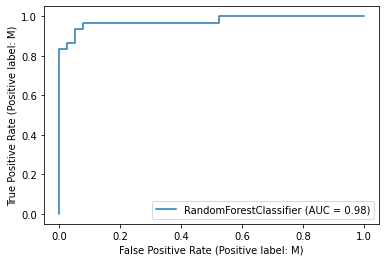

In [401]:
metrics.plot_roc_curve(rfc_5, X_test, y_test)

In [402]:
cols_to_scale = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                 'concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se',
                 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
                 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']
estimator = rfc_5.estimators_[5]
export_graphviz(
            estimator,
            feature_names=cols_to_scale[:20],
            class_names=['M','B'],
            rounded=True,
            filled=True,
            out_file=("meanse_under_RFC.dot"),
        )

In [403]:
!dot -Tpng meanse_under_RFC.dot -o meanse_under_RFC.png

In [404]:
#undersample, all params
df_6 = pd.read_csv("data_under.csv")
#using all values 
X = df_6.iloc[:,2:32]
y = df_6.iloc[:,1]

In [405]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size = 0.2, random_state=42)

In [406]:
rfc_6 = RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [407]:
rfc_6.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [408]:
y_pred = rfc_6.predict(X_test)

In [409]:
print("for undersample dataset, accuracy_Score is:",metrics.accuracy_score(y_test, y_pred))

for undersample dataset, accuracy_Score is: 0.9558823529411765


In [410]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       1.00      0.92      0.96        38
           M       0.91      1.00      0.95        30

    accuracy                           0.96        68
   macro avg       0.95      0.96      0.96        68
weighted avg       0.96      0.96      0.96        68



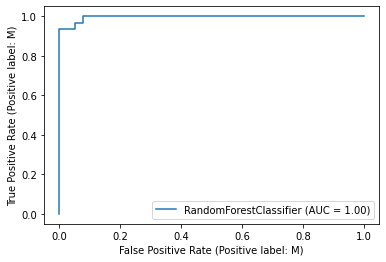

In [411]:
metrics.plot_roc_curve(rfc_6, X_test, y_test)

In [413]:
cols_to_scale = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                 'concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se',
                 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
                 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']
estimator = rfc_6.estimators_[5]
export_graphviz(
            estimator,
            feature_names=cols_to_scale[:],
            class_names=['M','B'],
            rounded=True,
            filled=True,
            out_file=("all_under_RFC.dot"),
        )

In [414]:
!dot -Tpng all_under_RFC.dot -o all_under_RFC.png

# RandomForests - Standard Dataset

In [416]:
#fullsample, mean params
df_7 = pd.read_csv("BC_Data.csv")
#using mean values of the 10 parameters
X = df_7.iloc[:,2:12]
y = df_7.iloc[:,1]

In [417]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size = 0.2, random_state=42)

In [418]:
rfc_7 = RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [419]:
rfc_7.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [420]:
y_pred = rfc_7.predict(X_test)

In [421]:
print("for undersample dataset, accuracy_Score is:",metrics.accuracy_score(y_test, y_pred))

for undersample dataset, accuracy_Score is: 0.9340659340659341


In [422]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      0.96      0.95        55
           M       0.94      0.89      0.91        36

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91



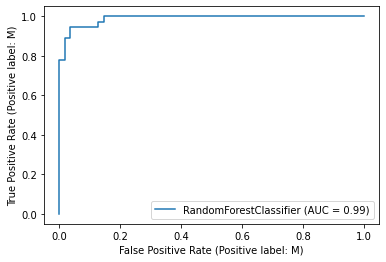

In [423]:
metrics.plot_roc_curve(rfc_7, X_test, y_test)

In [436]:
cols_to_scale = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                 'concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se',
                 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
                 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']
estimator = rfc_7.estimators_[5]
export_graphviz(
            estimator,
            feature_names=cols_to_scale[:10],
            class_names=['M','B'],
            rounded=True,
            filled=True,
            out_file=("mean_full_RFC.dot"),
        )

In [437]:
!dot -Tpng mean_full_RFC.dot -o mean_full_RFC.png

In [427]:
#fullsample, mean+se params
df_8 = pd.read_csv("BC_Data.csv")
#using mean values of the 20 parameters
X = df_8.iloc[:,2:22]
y = df_8.iloc[:,1]

In [428]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size = 0.2, random_state=42)

In [429]:
rfc_8 = RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [430]:
rfc_8.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [431]:
y_pred = rfc_8.predict(X_test)

In [432]:
print("for undersample dataset, accuracy_Score is:",metrics.accuracy_score(y_test, y_pred))

for undersample dataset, accuracy_Score is: 0.9340659340659341


In [433]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      0.96      0.95        55
           M       0.94      0.89      0.91        36

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91



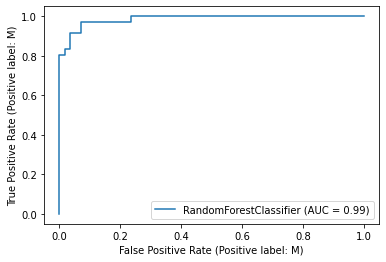

In [434]:
metrics.plot_roc_curve(rfc_8, X_test, y_test)

In [435]:
cols_to_scale = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                 'concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se',
                 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
                 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']
estimator = rfc_8.estimators_[5]
export_graphviz(
            estimator,
            feature_names=cols_to_scale[:20],
            class_names=['M','B'],
            rounded=True,
            filled=True,
            out_file=("meanse_full_RFC.dot"),
        )

In [449]:
!dot -Tpng meanse_full_RFC.dot -o meanse_full_RFC.png

In [438]:
#fullsample, all params
df_9 = pd.read_csv("BC_Data.csv")
#using mean values of the 20 parameters
X = df_9.iloc[:,2:32]
y = df_9.iloc[:,1]

In [439]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size = 0.2, random_state=42)

In [440]:
rfc_9 = RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [441]:
rfc_9.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

In [443]:
y_pred = rfc_9.predict(X_test)

In [444]:
print("for undersample dataset, accuracy_Score is:",metrics.accuracy_score(y_test, y_pred))

for undersample dataset, accuracy_Score is: 0.9560439560439561


In [445]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.95      0.98      0.96        55
           M       0.97      0.92      0.94        36

    accuracy                           0.96        91
   macro avg       0.96      0.95      0.95        91
weighted avg       0.96      0.96      0.96        91



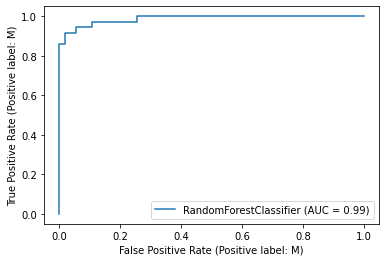

In [446]:
metrics.plot_roc_curve(rfc_9, X_test, y_test)

In [447]:
cols_to_scale = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                 'concavity_mean','concave points_mean','symmetry_mean', 'fractal_dimension_mean','radius_se',
                 'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
                 'concave points_se','symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
                 'symmetry_worst', 'fractal_dimension_worst']
estimator = rfc_9.estimators_[5]
export_graphviz(
            estimator,
            feature_names=cols_to_scale[:],
            class_names=['M','B'],
            rounded=True,
            filled=True,
            out_file=("all_full_RFC.dot"),
        )

In [448]:
!dot -Tpng all_full_RFC.dot -o all_full_RFC.png

# SVM - Standard Dataset

In [450]:
from sklearn.svm import SVC

              precision    recall  f1-score   support

           B       0.95      0.95      0.95        55
           M       0.92      0.92      0.92        36

    accuracy                           0.93        91
   macro avg       0.93      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91

for fullsample dataset, accuracy_Score is: 0.9340659340659341


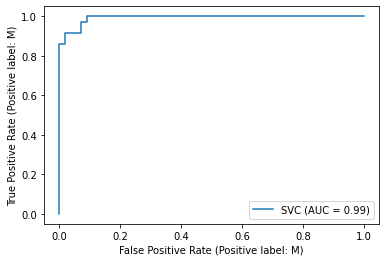

In [463]:
#fullsample, mean params
sm = pd.read_csv("BC_Data.csv")
#using mean values of the 10 parameters
X = sm.iloc[:,2:12]
y = sm.iloc[:,1]
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size = 0.2, random_state=42)
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
print("for fullsample dataset, accuracy_Score is:",metrics.accuracy_score(y_test, y_pred))
metrics.plot_roc_curve(svc, X_test, y_test)



              precision    recall  f1-score   support

           B       0.96      0.95      0.95        55
           M       0.92      0.94      0.93        36

    accuracy                           0.95        91
   macro avg       0.94      0.94      0.94        91
weighted avg       0.95      0.95      0.95        91

for fullsample dataset, accuracy_Score is: 0.945054945054945


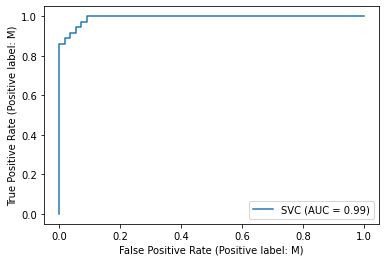

In [465]:
#using mean+se values of the 20 parameters
X1 = sm.iloc[:,2:22]
y1 = sm.iloc[:,1]
X1_train, X1_tmp, y1_train, y1_tmp = train_test_split(X1, y1, test_size = 0.2, random_state=42)
X1_test, X1_valid, y1_test, y1_valid = train_test_split(X1_tmp, y1_tmp, test_size = 0.2, random_state=42)
svc1 = SVC(kernel='linear')
svc1.fit(X1_train, y1_train)
y1_pred = svc1.predict(X1_test)
print(classification_report(y1_test, y1_pred))
print("for fullsample dataset, accuracy_Score is:",metrics.accuracy_score(y1_test, y1_pred))
metrics.plot_roc_curve(svc1, X1_test, y1_test)

              precision    recall  f1-score   support

           B       0.93      1.00      0.96        55
           M       1.00      0.89      0.94        36

    accuracy                           0.96        91
   macro avg       0.97      0.94      0.95        91
weighted avg       0.96      0.96      0.96        91

for fullsample dataset, accuracy_Score is: 0.9560439560439561


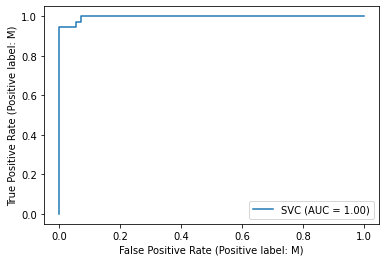

In [466]:

#using all values of the all parameters
X2 = sm.iloc[:,2:32]
y2 = sm.iloc[:,1]

X2_train, X2_tmp, y2_train, y2_tmp = train_test_split(X2, y2, test_size = 0.2, random_state=42)
X2_test, X2_valid, y2_test, y2_valid = train_test_split(X2_tmp, y2_tmp, test_size = 0.2, random_state=42)

svc2 = SVC(kernel='linear')
svc2.fit(X2_train, y2_train)
y2_pred = svc2.predict(X2_test)
print(classification_report(y2_test, y2_pred))
print("for fullsample dataset, accuracy_Score is:",metrics.accuracy_score(y2_test, y2_pred))
metrics.plot_roc_curve(svc2, X2_test, y2_test)

# SVM - Oversample

              precision    recall  f1-score   support

           B       0.87      0.98      0.92        48
           M       0.98      0.89      0.94        66

    accuracy                           0.93       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114

for fullsample dataset, accuracy_Score is: 0.9298245614035088


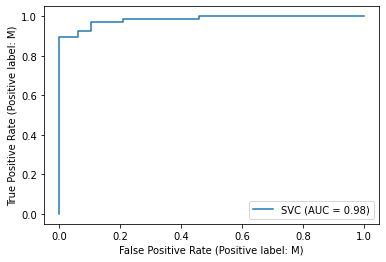

In [467]:
#fullsample, mean params
sm = pd.read_csv("data_over.csv")
#using mean values of the 10 parameters
X = sm.iloc[:,2:12]
y = sm.iloc[:,1]
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size = 0.2, random_state=42)
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
print("for fullsample dataset, accuracy_Score is:",metrics.accuracy_score(y_test, y_pred))
metrics.plot_roc_curve(svc, X_test, y_test)

              precision    recall  f1-score   support

           B       0.90      0.96      0.93        48
           M       0.97      0.92      0.95        66

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

for fullsample dataset, accuracy_Score is: 0.9385964912280702


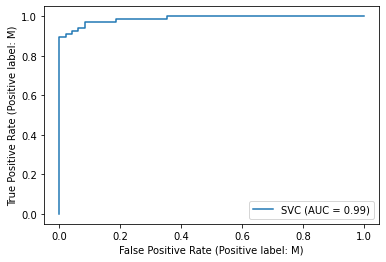

In [468]:
#using mean+se values of the 20 parameters
X1 = sm.iloc[:,2:22]
y1 = sm.iloc[:,1]
X1_train, X1_tmp, y1_train, y1_tmp = train_test_split(X1, y1, test_size = 0.2, random_state=42)
X1_test, X1_valid, y1_test, y1_valid = train_test_split(X1_tmp, y1_tmp, test_size = 0.2, random_state=42)
svc1 = SVC(kernel='linear')
svc1.fit(X1_train, y1_train)
y1_pred = svc1.predict(X1_test)
print(classification_report(y1_test, y1_pred))
print("for fullsample dataset, accuracy_Score is:",metrics.accuracy_score(y1_test, y1_pred))
metrics.plot_roc_curve(svc1, X1_test, y1_test)

              precision    recall  f1-score   support

           B       0.96      0.98      0.97        48
           M       0.98      0.97      0.98        66

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

for fullsample dataset, accuracy_Score is: 0.9736842105263158


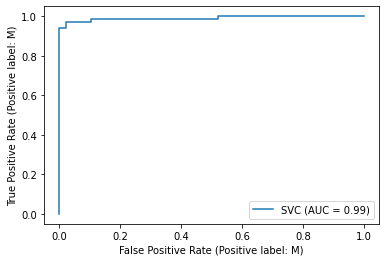

In [469]:
#using all values of the all parameters
X2 = sm.iloc[:,2:32]
y2 = sm.iloc[:,1]


X2_train, X2_tmp, y2_train, y2_tmp = train_test_split(X2, y2, test_size = 0.2, random_state=42)
X2_test, X2_valid, y2_test, y2_valid = train_test_split(X2_tmp, y2_tmp, test_size = 0.2, random_state=42)

svc2 = SVC(kernel='linear')
svc2.fit(X2_train, y2_train)
y2_pred = svc2.predict(X2_test)
print(classification_report(y2_test, y2_pred))
print("for fullsample dataset, accuracy_Score is:",metrics.accuracy_score(y2_test, y2_pred))
metrics.plot_roc_curve(svc2, X2_test, y2_test)

# SVM - Undersample

              precision    recall  f1-score   support

           B       0.95      0.95      0.95        38
           M       0.93      0.93      0.93        30

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68

for fullsample dataset, accuracy_Score is: 0.9411764705882353


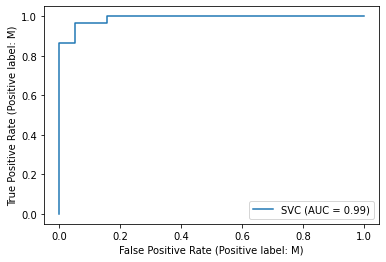

In [470]:
#fullsample, mean params
sm = pd.read_csv("data_under.csv")
#using mean values of the 10 parameters
X = sm.iloc[:,2:12]
y = sm.iloc[:,1]
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size = 0.2, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size = 0.2, random_state=42)
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
print("for fullsample dataset, accuracy_Score is:",metrics.accuracy_score(y_test, y_pred))
metrics.plot_roc_curve(svc, X_test, y_test)

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        38
           M       0.97      0.97      0.97        30

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68

for fullsample dataset, accuracy_Score is: 0.9705882352941176


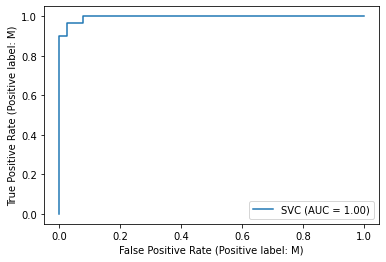

In [471]:
#using mean+se values of the 20 parameters
X1 = sm.iloc[:,2:22]
y1 = sm.iloc[:,1]
X1_train, X1_tmp, y1_train, y1_tmp = train_test_split(X1, y1, test_size = 0.2, random_state=42)
X1_test, X1_valid, y1_test, y1_valid = train_test_split(X1_tmp, y1_tmp, test_size = 0.2, random_state=42)
svc1 = SVC(kernel='linear')
svc1.fit(X1_train, y1_train)
y1_pred = svc1.predict(X1_test)
print(classification_report(y1_test, y1_pred))
print("for fullsample dataset, accuracy_Score is:",metrics.accuracy_score(y1_test, y1_pred))
metrics.plot_roc_curve(svc1, X1_test, y1_test)

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        38
           M       0.97      0.97      0.97        30

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68

for fullsample dataset, accuracy_Score is: 0.9705882352941176


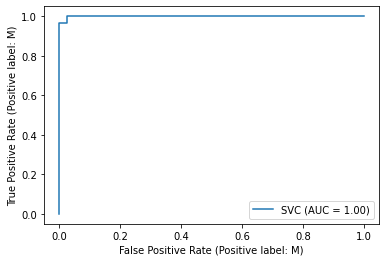

In [472]:
#using all values of the all parameters
X2 = sm.iloc[:,2:32]
y2 = sm.iloc[:,1]


X2_train, X2_tmp, y2_train, y2_tmp = train_test_split(X2, y2, test_size = 0.2, random_state=42)
X2_test, X2_valid, y2_test, y2_valid = train_test_split(X2_tmp, y2_tmp, test_size = 0.2, random_state=42)

svc2 = SVC(kernel='linear')
svc2.fit(X2_train, y2_train)
y2_pred = svc2.predict(X2_test)
print(classification_report(y2_test, y2_pred))
print("for fullsample dataset, accuracy_Score is:",metrics.accuracy_score(y2_test, y2_pred))
metrics.plot_roc_curve(svc2, X2_test, y2_test)